## Setup

In [2]:
import os
import matplotlib.pyplot as plt

# Get and print current working directory
cwd = os.path.dirname(os.getcwd())
print("Current working directory:", cwd)

# Define output path
output_dir = os.path.join(cwd, "data", "aoi")
dir_figure = os.path.join(cwd, "figures")


Current working directory: d:\natcap\invest-mental-health


In [3]:
import geopandas as gpd
import pandas as pd
import numpy as np

# Load shapefiles
dir_shp = 'D:/data/shp/US_census_Cartographic_Boundary_Shapefiles' 

dir_cbsa  = 'D:/data/shp/US_census_Cartographic_Boundary_Shapefiles/UAC/cb_2020_us_cbsa_500k/cb_2020_us_cbsa_500k.shp'
dir_metdiv= 'D:/data/shp/US_census_Cartographic_Boundary_Shapefiles/UAC/cb_2020_us_metdiv_500k/cb_2020_us_metdiv_500k.shp'
dir_ua    = 'D:/data/shp/US_census_Cartographic_Boundary_Shapefiles/UAC/cb_2020_us_ua20_500k/cb_2020_us_ua20_500k.shp'

dir_place = 'D:/data/shp/US_census_Cartographic_Boundary_Shapefiles/UAC/cb_2020_us_place_500k/cb_2020_us_place_500k.shp'
dir_place_cdc = 'D:/natcap/PLACES/raw/500Cities_City_11082016/CityBoundaries.shp'

dir_tract = 'D:/data/shp/US_census_Cartographic_Boundary_Shapefiles/cb_2020_us_tract_500k/cb_2020_us_tract_500k.shp'
dir_bg    = 'D:/data/shp/US_census_Cartographic_Boundary_Shapefiles/cb_2019_us_bg_500k/cb_2019_us_bg_500k.shp'



### related data

In [4]:
tracts = gpd.read_file(dir_tract)
# bg = gpd.read_file(dir_bg)


# Load tract population data
dir_tract_pop = os.path.join(output_dir, 'tract_pop_2020.csv')
tract_pop = pd.read_csv(dir_tract_pop)
# drop unnecessary columns in tract population data
tract_pop = tract_pop.drop(columns=['county_fips'])
# print(tract_pop.head())


# drop unnecessary columns in tracts
tracts = tracts.drop(columns=['AFFGEOID', 'TRACTCE', 'NAME', 'NAMELSAD', 'STUSPS', 'NAMELSADCO', 'STATE_NAME', 'LSAD', 'AWATER'])

# Calculate original tract area
tracts['tract_area'] = tracts.geometry.area

# Merge population by GEOID
# Ensure GEOID is a string in both dataframes
tracts['GEOID'] = tracts['GEOID'].astype(str)
tract_pop['GEOID'] = tract_pop['GEOID'].astype(str).str.zfill(11)
tracts = tracts.merge(tract_pop, on="GEOID", how="left")

print(tracts.head())


  STATEFP COUNTYFP        GEOID      ALAND  \
0      06      077  06077003406     839414   
1      06      077  06077004402    4346363   
2      06      077  06077004600  136907222   
3      06      077  06077001400    1949841   
4      06      077  06077003106    1633788   

                                            geometry  tract_area    variable  \
0  POLYGON ((-121.309 38.02824, -121.30461 38.028...    0.000088  B01003_001   
1  POLYGON ((-121.27338 38.10811, -121.27286 38.1...    0.000446  B01003_001   
2  POLYGON ((-121.411 38.23193, -121.40976 38.232...    0.014287  B01003_001   
3  POLYGON ((-121.30988 37.98438, -121.30745 37.9...    0.000215  B01003_001   
4  POLYGON ((-121.37304 37.99888, -121.37139 38.0...    0.000192  B01003_001   

   pop_tract    year  
0     3809.0  2020.0  
1     6006.0  2020.0  
2     6365.0  2020.0  
3     4630.0  2020.0  
4     3948.0  2020.0  


C:\Users\pc\AppData\Local\Temp\ipykernel_3484\3525283153.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  tracts['tract_area'] = tracts.geometry.area


## MSA 

In [267]:
cbsa   = gpd.read_file(dir_cbsa)
metdiv = gpd.read_file(dir_metdiv)

### filter metro area

In [268]:
## data 1: the mixed Metropolitan Statistical Areas (MSAs) and Micro Areas
# Filter for Metropolitan Statistical Areas (MSAs) 
# .copy() creates a new, independent DataFrame, so when you assign to it (e.g., adding a column), pandas knows it's safe
cbsa_met = cbsa[cbsa['NAMELSAD'].str.contains('Metro')].copy()

# adding an empty column
cbsa_met.loc[:, 'METDIVFP'] = None
# Move the column to the third position
cbsa_met = cbsa_met.iloc[:, :2].join(cbsa_met[['METDIVFP']]).join(cbsa_met.iloc[:, 2:-1])


## data 2: the Metropolitan Divisions (MetDivs)
# Filter for Metropolitan Divisions (MetDivs)
metdiv_met = metdiv[metdiv['NAMELSAD'].str.contains('Metro')]

print(metdiv_met.head())
# metdiv_met = metdiv_met.drop('METDIVFP', axis=1)

print(cbsa_met.columns)
print(metdiv_met.columns)



  CSAFP CBSAFP METDIVFP             AFFGEOID       GEOID  \
0   348  31080    11244  314M600US3108011244  3108011244   
1   148  14460    14454  314M600US1446014454  1446014454   
2   148  14460    15764  314M600US1446015764  1446015764   
3   428  37980    15804  314M600US3798015804  3798015804   
4   176  16980    16984  314M600US1698016984  1698016984   

                              NAME  \
0     Anaheim-Santa Ana-Irvine, CA   
1                       Boston, MA   
2  Cambridge-Newton-Framingham, MA   
3                       Camden, NJ   
4  Chicago-Naperville-Evanston, IL   

                                         NAMELSAD LSAD       ALAND  \
0     Anaheim-Santa Ana-Irvine, CA Metro Division   M3  2053449483   
1                       Boston, MA Metro Division   M3  2882301581   
2  Cambridge-Newton-Framingham, MA Metro Division   M3  3393859579   
3                       Camden, NJ Metro Division   M3  3477449505   
4  Chicago-Naperville-Evanston, IL Metro Division   M3  8106

### add population

In [269]:
f = os.path.join(dir_shp, 'census_metro', 'cbsa-est2024-alldata.csv'); print(f)

pop = pd.read_csv(f, encoding='latin1')  # or encoding='ISO-8859-1'

# pop['STATE'] = pop['STATE'].astype(str).str.zfill(2)
# pop['PLACE'] = pop['PLACE'].astype(str).str.zfill(5)


pop = pop.drop(columns=['NAME', 'STCOU'])
pop = pop.drop(columns=[col for col in pop.columns if 'MIG' in col or 'RESIDUAL' in col or 'NATURAL' in col or 'BIRTH' in col or 'DEATH' in col or 'CHG' in col])

print(pop['LSAD'].unique())

pop = pop[pop['LSAD'].isin(["Metropolitan Statistical Area", "Metropolitan Division"])]

pop.rename(columns=lambda x: x.replace("ESTIMATE", "") if "ESTIMATE" in x else x, inplace=True)
# rename columns for clarity
pop = pop.rename(columns={
    'CBSA': 'CBSAFP'
})

## add GEOID to be used for merging with met_div
# pop['GEOID_MDIV'] = pop['CBSAFP'].astype(str) + pop['MDIV'].astype(str)
pop['GEOID_MDIV'] = pop['CBSAFP'].astype(str) + pop['MDIV'].apply(lambda x: str(int(x)) if pd.notnull(x) else '')

## there might some repeated rows in the population data,
pop_distinct = pop.drop_duplicates(subset=['GEOID_MDIV', 'CBSAFP'], keep='first')

# print(pop.head())
print('pop.shape \n', pop.shape)
print('pop_distinct.shape \n', pop_distinct.shape)
print('pop.columns \n', pop.columns)

# 1 ... Merge population data with `cbsa_met` GeoDataFrame
cbsa_met['CBSAFP'] = cbsa_met['CBSAFP'].astype(str)
pop['CBSAFP'] = pop['CBSAFP'].astype(str)
cbsa_met_data = cbsa_met.merge(pop, on='CBSAFP', how='left')

# add population density
cbsa_met_data['POP_KM2'] = cbsa_met_data['POP2020'] / cbsa_met_data['ALAND'] * 1000000  # Convert to people per square kilometer

print('cbsa_met_data: \n', cbsa_met_data.head())



D:/data/shp/US_census_Cartographic_Boundary_Shapefiles\census_metro\cbsa-est2024-alldata.csv
['Metropolitan Statistical Area' 'County or equivalent'
 'Metropolitan Division' 'Micropolitan Statistical Area']
pop.shape 
 (424, 10)
pop_distinct.shape 
 (424, 10)
pop.columns 
 Index(['CBSAFP', 'MDIV', 'LSAD', 'SBASE2020', 'POP2020', 'POP2021', 'POP2022',
       'POP2023', 'POP2024', 'GEOID_MDIV'],
      dtype='object')
cbsa_met_data: 
   CSAFP CBSAFP METDIVFP        AFFGEOID  GEOID                  NAME  \
0  None  43620     None  310M600US43620  43620       Sioux Falls, SD   
1   184  17460     None  310M600US17460  17460  Cleveland-Elyria, OH   
2   174  16860     None  310M600US16860  16860    Chattanooga, TN-GA   
3   324  29340     None  310M600US29340  29340      Lake Charles, LA   
4   406  25220     None  310M600US25220  25220           Hammond, LA   

                          NAMELSAD LSAD_x       ALAND      AWATER  ... MDIV  \
0       Sioux Falls, SD Metro Area     M1  667025688

In [270]:


# 2 ... Merge population data with `metdiv_met` GeoDataFrame
pop_div = pop[pop['MDIV'].notna()]
pop_div['GEOID_MDIV'] = pop_div['GEOID_MDIV'].astype(str)


# print(metdiv_met.head())
# print('\n\n')
# print(pop_div.head())

metdiv_met['GEOID'] = metdiv_met['GEOID'].astype(str)
metdiv_met_data = metdiv_met.merge(pop_div, left_on='GEOID', right_on='GEOID_MDIV', how='left')

# add population density
metdiv_met_data['POP_KM2'] = metdiv_met_data['POP2020'] / metdiv_met_data['ALAND'] * 1000000  # Convert to people per square kilometer



print(metdiv_met_data.head())

  CSAFP CBSAFP_x METDIVFP             AFFGEOID       GEOID  \
0   348    31080    11244  314M600US3108011244  3108011244   
1   148    14460    14454  314M600US1446014454  1446014454   
2   148    14460    15764  314M600US1446015764  1446015764   
3   428    37980    15804  314M600US3798015804  3798015804   
4   176    16980    16984  314M600US1698016984  1698016984   

                              NAME  \
0     Anaheim-Santa Ana-Irvine, CA   
1                       Boston, MA   
2  Cambridge-Newton-Framingham, MA   
3                       Camden, NJ   
4  Chicago-Naperville-Evanston, IL   

                                         NAMELSAD LSAD_x       ALAND  \
0     Anaheim-Santa Ana-Irvine, CA Metro Division     M3  2053449483   
1                       Boston, MA Metro Division     M3  2882301581   
2  Cambridge-Newton-Framingham, MA Metro Division     M3  3393859579   
3                       Camden, NJ Metro Division     M3  3477449505   
4  Chicago-Naperville-Evanston, IL Met

C:\Users\pc\AppData\Local\Temp\ipykernel_20372\1960351877.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop_div['GEOID_MDIV'] = pop_div['GEOID_MDIV'].astype(str)


### combine 2 datasets

In [271]:

# Combine them by rows
metro_combined = gpd.GeoDataFrame(pd.concat([cbsa_met_data, metdiv_met_data], ignore_index=True))

# rename columns for clarity
metro_combined = metro_combined.rename(columns={
    'GEOID': 'GEOID_METRO', # old -> new
    'NAME': 'NAME_METRO',
    'ALAND': 'ALAND_METRO',
    'AWATER': 'AWATER_METRO',
})


# drop unnecessary columns
metro_combined = metro_combined.drop(columns=['CBSAFP_x', 'CBSAFP_y'])

# print('metro_combined: \n', metro_combined.head())



## add a `level` column to the combined DataFrame ---------------------------------------------
# Step 1: Count number of rows per CBSAFP
metro_combined['count'] = metro_combined.groupby('CBSAFP')['CBSAFP'].transform('count')

# Step 2: Apply logic to create 'level' column
metro_combined['level'] = np.where(
    metro_combined['count'] == 1, 1,
    np.where(
        (metro_combined['count'] > 1) & (metro_combined['METDIVFP'].isna()), 0, 1
    )
)

# print(metro_combined[['CBSAFP', 'METDIVFP', 'level']].head())



## make a copy of data that remove the overlapping areas -- keep the `MetDivs` and remove the overlapped `MSAs`
metro_combined_metdiv_no_overlap = metro_combined[metro_combined['level'] == 1].copy()



print(cbsa_met.shape)
print(metdiv_met.shape)
print('metro_combined: \n\t', metro_combined.shape)
print('metro_combined_metdiv_no_overlap: \n\t', metro_combined_metdiv_no_overlap.shape)
print(metro_combined_metdiv_no_overlap.columns)

(392, 11)
(31, 11)
metro_combined: 
	 (460, 23)
metro_combined_metdiv_no_overlap: 
	 (410, 23)
Index(['CSAFP', 'CBSAFP', 'METDIVFP', 'AFFGEOID', 'GEOID_METRO', 'NAME_METRO',
       'NAMELSAD', 'LSAD_x', 'ALAND_METRO', 'AWATER_METRO', 'geometry', 'MDIV',
       'LSAD_y', 'SBASE2020', 'POP2020', 'POP2021', 'POP2022', 'POP2023',
       'POP2024', 'GEOID_MDIV', 'POP_KM2', 'count', 'level'],
      dtype='object')


### save combined MSA

In [272]:
# Save shapefile
output_path = os.path.join(output_dir, "cb_2020_us_metro_combined.shp")
metro_combined.to_file(output_path)
print(f"Shapefile saved to:\n\t {output_path}")


output_path = os.path.join(output_dir, "cb_2020_us_metro_combined_metdiv_no_overlap.shp")
metro_combined_metdiv_no_overlap.to_file(output_path)
print(f"Shapefile saved to:\n\t {output_path}")

Shapefile saved to:
	 d:\natcap\invest-mental-health\data\aoi\cb_2020_us_metro_combined.shp
Shapefile saved to:
	 d:\natcap\invest-mental-health\data\aoi\cb_2020_us_metro_combined_metdiv_no_overlap.shp


C:\Users\pc\AppData\Local\Temp\ipykernel_20372\910354018.py:3: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  metro_combined.to_file(output_path)
c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'GEOID_METRO' to 'GEOID_METR'
  ogr_write(
c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'ALAND_METRO' to 'ALAND_METR'
  ogr_write(
c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'AWATER_METRO' to 'AWATER_MET'
  ogr_write(
C:\Users\pc\AppData\Local\Temp\ipykernel_20372\910354018.py:8: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  metro_combined_metdiv_no_overlap.to_file(output_path)
c:\Users\pc\AppData\Local\Program

### overlay with tract data

In [273]:
print('metro_combined_metdiv_no_overlap: \n', metro_combined_metdiv_no_overlap.head())
print('\n\n')
print('tract: \n', tracts.head())



metro_combined_metdiv_no_overlap: 
   CSAFP CBSAFP METDIVFP        AFFGEOID GEOID_METRO            NAME_METRO  \
0  None  43620     None  310M600US43620       43620       Sioux Falls, SD   
1   184  17460     None  310M600US17460       17460  Cleveland-Elyria, OH   
2   174  16860     None  310M600US16860       16860    Chattanooga, TN-GA   
3   324  29340     None  310M600US29340       29340      Lake Charles, LA   
4   406  25220     None  310M600US25220       25220           Hammond, LA   

                          NAMELSAD LSAD_x  ALAND_METRO  AWATER_METRO  ...  \
0       Sioux Falls, SD Metro Area     M1   6670256887      27900457  ...   
1  Cleveland-Elyria, OH Metro Area     M1   5176805788    5128428315  ...   
2    Chattanooga, TN-GA Metro Area     M1   5409949983     126699774  ...   
3      Lake Charles, LA Metro Area     M1   6083163521    1766798991  ...   
4           Hammond, LA Metro Area     M1   2049124442     136690438  ...   

  SBASE2020   POP2020   POP2021   POP2

In [274]:

# Spatial Intersection
intersection = gpd.overlay(tracts, metro_combined_metdiv_no_overlap, how='intersection', keep_geom_type=False)

# Compute area of intersection
intersection['overlap_area'] = intersection.geometry.area



C:\Users\pc\AppData\Local\Temp\ipykernel_20372\1406321104.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  intersection['overlap_area'] = intersection.geometry.area


In [275]:
# print('intersection: \n', intersection.head())
# print(intersection.columns)


# Second overlap calculation with NAME20
tract_aoi = intersection.groupby(['GEOID', 'NAME_METRO'])['overlap_area'].sum().reset_index() # GEOID is the tract ID
# print('tract_aoi: \n', tract_aoi.head())

# Prepare metadata (drop geometry-related columns and deduplicate)
intersection_meta = intersection.drop(columns=['overlap_area', 'geometry']).drop_duplicates(subset=['GEOID', 'NAME_METRO'])

# Step 2: Merge back on GEOID and NAME_METRO
tract_aoi_overlap = pd.merge(tract_aoi, 
                             intersection_meta, 
                             on=['GEOID', 'NAME_METRO'], 
                             how='left')


# Step 3: Add tract information (excluding geometry for now)
tract_info = tracts.drop(columns=['geometry', 'STATEFP', 'COUNTYFP', 'ALAND'])


# print('tract_info: \n', tract_info.head())
# print('tract_aoi_overlap: \n', tract_aoi_overlap.head())
# tract_aoi_overlap = tract_aoi_overlap.merge(tract_info, on='GEOID', how='left')


# Step 4: Calculate overlap ratio and filter
tract_aoi_overlap['overlap_ratio'] = tract_aoi_overlap['overlap_area'] / tract_aoi_overlap['tract_area']
tract_aoi_overlap = tract_aoi_overlap[tract_aoi_overlap['overlap_ratio'] >= 0.1]


# Step 5: Drop unnecessary columns
tract_aoi_overlap = tract_aoi_overlap.drop(columns=['overlap_area', 'tract_area', 'NAMELSAD', 'AFFGEOID'])

# print('\n\n tract_aoi_overlap: \n', tract_aoi_overlap.head())
print('\n\n tract_aoi_overlap: \n', tract_aoi_overlap.columns)

# Step 6: Merge back with geometry — ensure no duplicated 'geometry' columns
if 'geometry' in tract_aoi_overlap.columns:
    tract_aoi_overlap = tract_aoi_overlap.drop(columns=['geometry'])
# Make sure tract_aoi_overlap is merged with geometry
tract_aoi_overlap_gdf = tract_aoi_overlap.merge(tracts[['GEOID', 'geometry']], on='GEOID', how='left')
tract_aoi_overlap_gdf = gpd.GeoDataFrame(tract_aoi_overlap_gdf, geometry='geometry', crs=tracts.crs)


# print('\n\n tract_aoi_overlap \n', tract_aoi_overlap.head())
print(tract_aoi_overlap_gdf.shape)
print('\n\n tract_aoi_overlap_gdf: \n', tract_aoi_overlap_gdf.head())


# Save shapefile
output_path = os.path.join(output_dir, "tract_metro_2020.shp")
tract_aoi_overlap_gdf.to_file(output_path)
print(f"Shapefile saved to:\n\t {output_path}")



 tract_aoi_overlap: 
 Index(['GEOID', 'NAME_METRO', 'STATEFP', 'COUNTYFP', 'ALAND', 'variable',
       'pop_tract', 'year', 'CSAFP', 'CBSAFP', 'METDIVFP', 'GEOID_METRO',
       'LSAD_x', 'ALAND_METRO', 'AWATER_METRO', 'MDIV', 'LSAD_y', 'SBASE2020',
       'POP2020', 'POP2021', 'POP2022', 'POP2023', 'POP2024', 'GEOID_MDIV',
       'POP_KM2', 'count', 'level', 'overlap_ratio'],
      dtype='object')
(69061, 29)


 tract_aoi_overlap_gdf: 
          GEOID      NAME_METRO STATEFP COUNTYFP    ALAND    variable  \
0  01001020100  Montgomery, AL      01      001  9825304  B01003_001   
1  01001020200  Montgomery, AL      01      001  3320818  B01003_001   
2  01001020300  Montgomery, AL      01      001  5349271  B01003_001   
3  01001020400  Montgomery, AL      01      001  6384282  B01003_001   
4  01001020501  Montgomery, AL      01      001  6203654  B01003_001   

   pop_tract    year CSAFP CBSAFP  ...   POP2021   POP2022   POP2023  \
0     1941.0  2020.0   388  33860  ...  384672.0  38

C:\Users\pc\AppData\Local\Temp\ipykernel_20372\1398611325.py:54: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  tract_aoi_overlap_gdf.to_file(output_path)


Shapefile saved to:
	 d:\natcap\invest-mental-health\data\aoi\tract_metro_2020.shp


c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'GEOID_METRO' to 'GEOID_METR'
  ogr_write(
c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'ALAND_METRO' to 'ALAND_METR'
  ogr_write(
c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'AWATER_METRO' to 'AWATER_MET'
  ogr_write(
c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'overlap_ratio' to 'overlap_ra'
  ogr_write(


### filter cities and plot



 met_i: 
             GEOID                           NAME_METRO STATEFP COUNTYFP  \
4561  06037101110  Los Angeles-Long Beach-Glendale, CA      06      037   
4562  06037101122  Los Angeles-Long Beach-Glendale, CA      06      037   
4563  06037101220  Los Angeles-Long Beach-Glendale, CA      06      037   
4564  06037101221  Los Angeles-Long Beach-Glendale, CA      06      037   
4565  06037101222  Los Angeles-Long Beach-Glendale, CA      06      037   

        ALAND    variable  pop_tract    year CSAFP CBSAFP  ...    POP2021  \
4561  1142401  B01003_001     3923.0  2020.0   348    NaN  ...  9809239.0   
4562  2644045  B01003_001     4119.0  2020.0   348    NaN  ...  9809239.0   
4563   698886  B01003_001     3775.0  2020.0   348    NaN  ...  9809239.0   
4564   354178  B01003_001     3787.0  2020.0   348    NaN  ...  9809239.0   
4565   296512  B01003_001     2717.0  2020.0   348    NaN  ...  9809239.0   

        POP2022    POP2023    POP2024  GEOID_MDIV    POP_KM2 count  level 

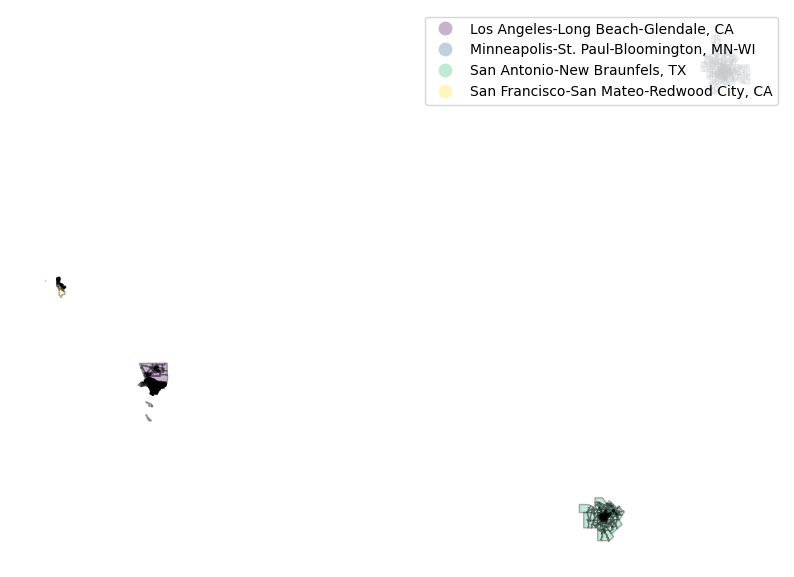

In [276]:
# Filter cities
# cities = ["San Francisco",  "Los Angeles"]
cities = ["San Francisco", "San Antonio", "Los Angeles", "Minneapolis"]
met_i = tract_aoi_overlap_gdf[tract_aoi_overlap_gdf['NAME_METRO'].str.contains('|'.join(cities))]

# print(met_i.shape)
print('\n\n met_i: \n', met_i.head())


# Plot 
import matplotlib.pyplot as plt
met_i.plot(
    column='NAME_METRO',   # Replace with your actual column name
    cmap='viridis', 
    alpha=0.3, 
    edgecolor='black', 
    legend=True,
    figsize=(10, 10))
plt.axis("off")
plt.show()


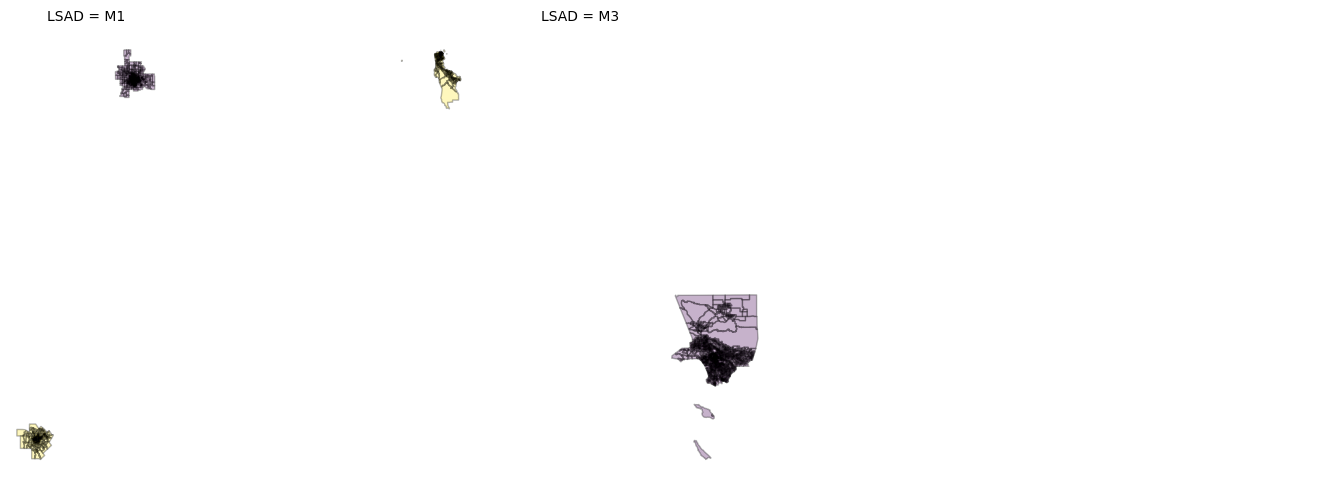

In [277]:
import matplotlib.pyplot as plt

# Group the GeoDataFrame by column 'B'
groups = met_i.groupby('LSAD_x')

# Set up the figure with subplots
n = len(groups)
ncols = 3  # You can adjust columns per row
nrows = -(-n // ncols)  # Ceiling division

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5*ncols, 5*nrows))
axes = axes.flatten()  # Flatten axes array for easy iteration

# Plot each group
for ax, (name, group) in zip(axes, groups):
    group.plot(
        column='NAME_METRO', 
        cmap='viridis', 
        alpha=0.3, 
        edgecolor='black', 
        legend=False,  # Skip individual legends for clarity
        ax=ax
    )
    ax.set_title(f'LSAD = {name}', fontsize=10)
    ax.axis('off')

# Turn off any unused axes
for ax in axes[len(groups):]:
    ax.axis('off')

plt.tight_layout()
plt.show()


### plot tracts by Metro

['Los Angeles-Long Beach-Glendale, CA', 'Minneapolis-St. Paul-Bloomington, MN-WI', 'San Antonio-New Braunfels, TX', 'San Francisco-San Mateo-Redwood City, CA']


C:\Users\pc\AppData\Local\Temp\ipykernel_20372\2377173853.py:65: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


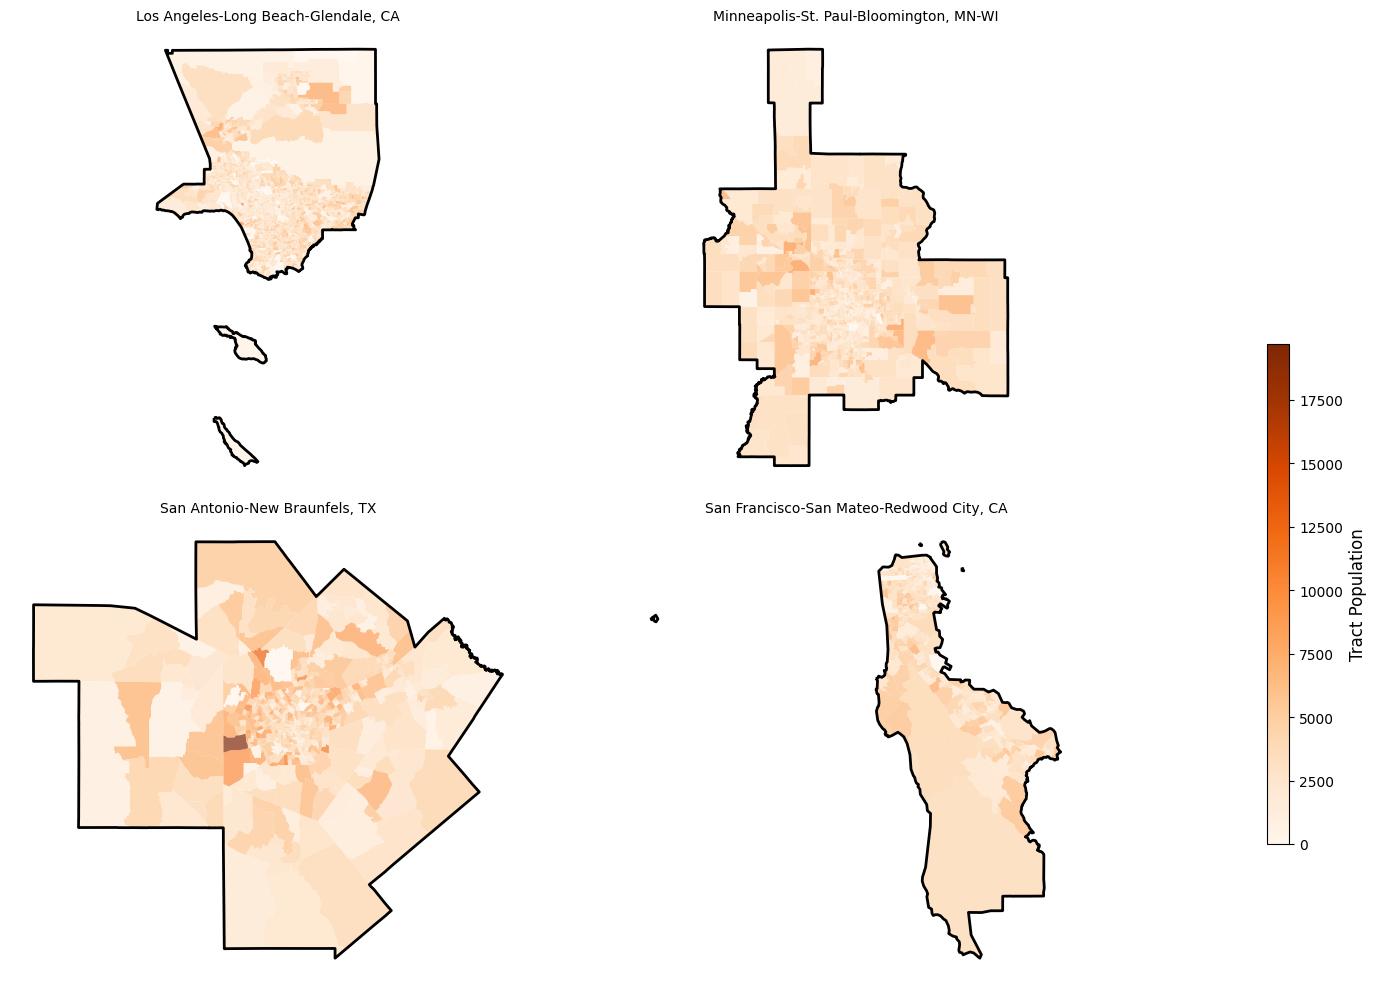

In [278]:
# Unique urban area names
urban_names = sorted(met_i['NAME_METRO'].unique()) 
print(urban_names)
n = len(urban_names)

# 1. Calculate global min/max for the color scale
vmin = met_i['pop_tract'].min()
vmax = met_i['pop_tract'].max()


# 2. Define layout
# Define layout: adjust rows/cols based on n
cols = 2
rows = (n + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))
axes = axes.flatten()

for i, name in enumerate(urban_names):
    ax = axes[i]
    subset = met_i[met_i['NAME_METRO'] == name]
    
    subset.plot(column='pop_tract', 
                ax=ax, 
                cmap='Oranges',
                vmin=vmin,            # Use global scale
                vmax=vmax,
                # edgecolor='gray',   
                # linewidth=0.1,
                # legend=True, 
                legend=False,         # Hide individual legends
                alpha=0.7)
    
    metro_combined_metdiv_no_overlap[
        metro_combined_metdiv_no_overlap['NAME_METRO'] == name
        ].boundary.plot(ax=ax, color='black', linewidth=2)
    
    ax.set_title(f"{name}", fontsize=10)
    ax.axis('off')

# Turn off any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')


## (1) simple layout ----------------------------
# plt.tight_layout()


## (2) Add a single shared colorbar -------------
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.cm as cm
import matplotlib.colorbar as cb

# Create colorbar axis
fig.subplots_adjust(right=0.9)
cax = fig.add_axes([0.92, 0.15, 0.015, 0.5])  # [left, bottom, width, height]

# Create scalar mappable
sm = cm.ScalarMappable(cmap='Oranges', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []  # dummy array for colorbar
cbar = fig.colorbar(sm, cax=cax)
cbar.set_label('Tract Population', fontsize=12)

plt.tight_layout(rect=[0, 0, 0.9, 1])




# 3. Save the figure
f = os.path.join(dir_figure, "aoi_facets_metro_2020.png")
plt.savefig(f, dpi=300)
plt.show()

## Place

In [5]:
place     = gpd.read_file(dir_place).sort_values(by='NAME')
place_cdc = gpd.read_file(dir_place_cdc).sort_values(by='NAME')

print(place.head())
print('\n\n')
print(place_cdc.head())


      STATEFP PLACEFP   PLACENS          AFFGEOID    GEOID        NAME  \
24687      42   00100  02389113  1600000US4200100  4200100  Aaronsburg   
5758       42   00104  02584431  1600000US4200104  4200104  Aaronsburg   
19433      60   00100  02414188  1600000US6000100  6000100        Aasu   
22495      01   00100  02582661  1600000US0100100  0100100      Abanda   
13456      28   00100  02405117  1600000US2800100  2800100   Abbeville   

             NAMELSAD STUSPS      STATE_NAME LSAD    ALAND   AWATER  \
24687  Aaronsburg CDP     PA    Pennsylvania   57  2292714        0   
5758   Aaronsburg CDP     PA    Pennsylvania   57  1439694        0   
19433    Aasu village     AS  American Samoa   47  9307060  2947766   
22495      Abanda CDP     AL         Alabama   57  7764034    34284   
13456  Abbeville town     MS     Mississippi   43  8960349        0   

                                                geometry  
24687  POLYGON ((-77.46173 40.9081, -77.44308 40.9136...  
5758   POL

### add pop

In [6]:
f = os.path.join(dir_shp, 'census_place', 'sub-est2024.csv'); print(f)

pop_place = pd.read_csv(f, encoding='latin1')  # or encoding='ISO-8859-1'

pop_place['STATE'] = pop_place['STATE'].astype(str).str.zfill(2)
pop_place['PLACE'] = pop_place['PLACE'].astype(str).str.zfill(5)

pop_place['GEOID'] = pop_place['STATE'] + pop_place['PLACE']

pop_place = pop_place.drop(columns=['COUNTY', 'NAME', 'COUSUB', 'CONCIT', 'PRIMGEO_FLAG', 'FUNCSTAT', 'STNAME', 'ESTIMATESBASE2020'])
pop_place.rename(columns=lambda x: x.replace("ESTIMATE", "") if "ESTIMATE" in x else x, inplace=True)


## there are some repeated rows in the place data, particularly due to the `SUMLEV` column
## -> need to distinct by Two Columns, Keep Others
pop_place_distinct = pop_place.drop_duplicates(subset=['GEOID', 'PLACE'], keep='first')

print('\n\npop_place shape:')
print(pop_place.shape)
print(pop_place_distinct.shape)

print(pop_place_distinct.head())


# Merge population data with place GeoDataFrame
place_data = place.merge(pop_place_distinct, on='GEOID', how='left')

# rename columns for clarity
place_data = place_data.rename(columns={
    'GEOID': 'GEOID_PLACE', # old -> new
    'NAME': 'NAME_PLACE'
})


# add population density
place_data['POP_KM2'] = place_data['POP2020'] / place_data['ALAND'] * 1000000  # Convert to people per square kilometer



D:/data/shp/US_census_Cartographic_Boundary_Shapefiles\census_place\sub-est2024.csv


pop_place shape:
(81334, 9)
(19580, 9)
   SUMLEV STATE  PLACE  POP2020  POP2021  POP2022  POP2023  POP2024    GEOID
0      40    01  00000  5033094  5049196  5076181  5117673  5157699  0100000
1     162    01  00124     2349     2329     2328     2337     2370  0100124
2     162    01  00460     4381     4315     4251     4204     4181  0100460
3     162    01  00484      659      665      670      669      676  0100484
4     162    01  00676      228      229      226      229      233  0100676


### filter Places based on pop

In [17]:

# Filter population and population density ----------------------------
# 1. Filter places with population greater than 40,000
#       This will keep only those places where the population estimate for 2020 is greater than 40,000
place_data_filtered = place_data[place_data['POP2020'] >= 50000]
print(f"Filtered places with population >= 50,000: \n\t {place_data_filtered.shape[0]}")

# 2. Filter based on population density 
pop_dense = 1500  # people per square kilometer
pop_dense = 1000  # people per square kilometer

place_high_pop = place_data_filtered[place_data_filtered['POP_KM2'] >= pop_dense]  # Keep only places with population density greater than 1500 people/km²
print(f"Filtered places with population density >= 1,000 people/km²: \n\t {place_data_filtered.shape[0]}")
# print(place_high_pop.columns)
# print('\n\n place_data: \n', place_data.head())

## number of places
print('original place_data: \n\t', place_data.shape)
print('filterred place_data (n > 50k, density > 1k per km2): \n\t', place_high_pop.shape)


## ----------------------------------
# Step 2: Find all states in the original dataset
all_states = place_data['STATE'].dropna().unique()


# Step 3: Find states not represented in the filtered result
states_in_filtered = place_high_pop['STATE'].dropna().unique()
states_missing = [s for s in all_states if s not in states_in_filtered]
print(f"states_missing: {states_missing}")


# Step 4: For each missing state, find the most populous place
additional_places = []
for state in states_missing:
    state_places = place_data[place_data['STATE'] == state]
    if not state_places.empty:
        top_place = state_places.sort_values('POP2020', ascending=False).iloc[0]
        additional_places.append(top_place)

# Step 5: Combine and deduplicate
if additional_places:
    additional_df = pd.DataFrame(additional_places)
    place_data_filtered = pd.concat([place_high_pop, additional_df])
    print(place_data_filtered.columns.tolist())

    place_data_filtered = place_data_filtered.drop_duplicates(subset='GEOID_PLACE')
else:
    place_data_filtered = place_high_pop

# Final summary
n_places = len(place_data_filtered)
print(f"✅ Final places retained: {len(place_data_filtered)}")
print(f"✅ States represented: {place_data_filtered['STATE'].nunique()}")


Filtered places with population >= 50,000: 
	 796
Filtered places with population density >= 1,000 people/km²: 
	 796
original place_data: 
	 (32188, 22)
filterred place_data (n > 50k, density > 1k per km2): 
	 (491, 22)
states_missing: ['28', '45', '01', '38', '46', '02', '47', '54', '05', '56', '50']
['STATEFP', 'PLACEFP', 'PLACENS', 'AFFGEOID', 'GEOID_PLACE', 'NAME_PLACE', 'NAMELSAD', 'STUSPS', 'STATE_NAME', 'LSAD', 'ALAND', 'AWATER', 'geometry', 'SUMLEV', 'STATE', 'PLACE', 'POP2020', 'POP2021', 'POP2022', 'POP2023', 'POP2024', 'POP_KM2']
✅ Final places retained: 502
✅ States represented: 51


### Save data

In [18]:
# Save the merged GeoDataFrame to a shapefile
output_path = os.path.join(output_dir, "cb_2020_us_place_with_population.shp")
place_data.to_file(output_path)

# save the filtered GeoDataFrame to a shapefile
output_path_filtered = os.path.join(output_dir, f"cb_2020_us_place_with_population_filtered_{pop_dense}_{n_places}.shp")
print(f"\n\n Shapefile saved to:\n {output_path_filtered} \n\n")
place_data_filtered.to_file(output_path_filtered)

C:\Users\pc\AppData\Local\Temp\ipykernel_3484\356043537.py:3: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  place_data.to_file(output_path)
c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'GEOID_PLACE' to 'GEOID_PLAC'
  ogr_write(
C:\Users\pc\AppData\Local\Temp\ipykernel_3484\356043537.py:8: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  place_data_filtered.to_file(output_path_filtered)
c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyogrio\geopandas.py:710: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(




 Shapefile saved to:
 d:\natcap\invest-mental-health\data\aoi\cb_2020_us_place_with_population_filtered_1000_502.shp 




c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'GEOID_PLACE' to 'GEOID_PLAC'
  ogr_write(


### overlay with tract

In [283]:
# Spatial Intersection
intersection = gpd.overlay(tracts, place_data_filtered, how='intersection', keep_geom_type=False)

# Compute area of intersection
intersection['overlap_area'] = intersection.geometry.area


C:\Users\pc\AppData\Local\Temp\ipykernel_20372\1873963832.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  intersection['overlap_area'] = intersection.geometry.area


In [284]:
# print('intersection: \n', intersection.head())

# Overlap calculation with NAME20
tract_aoi = intersection.groupby(['GEOID', 'NAME_PLACE'])['overlap_area'].sum().reset_index() # GEOID is the tract ID
# print('tract_aoi: \n', tract_aoi.head())


# Prepare metadata (drop geometry-related columns and deduplicate)
intersection_meta = intersection.drop(columns=['overlap_area', 'geometry']).drop_duplicates(subset=['GEOID', 'NAME_PLACE'])

print(tract_aoi.columns)
print(intersection.columns)
print(intersection_meta.columns)



Index(['GEOID', 'NAME_PLACE', 'overlap_area'], dtype='object')
Index(['STATEFP_1', 'COUNTYFP', 'GEOID', 'ALAND_1', 'tract_area', 'variable',
       'pop_tract', 'year', 'STATEFP_2', 'PLACEFP', 'PLACENS', 'AFFGEOID',
       'GEOID_PLACE', 'NAME_PLACE', 'NAMELSAD', 'STUSPS', 'STATE_NAME', 'LSAD',
       'ALAND_2', 'AWATER', 'SUMLEV', 'STATE', 'PLACE', 'POP2020', 'POP2021',
       'POP2022', 'POP2023', 'POP2024', 'POP_KM2', 'geometry', 'overlap_area'],
      dtype='object')
Index(['STATEFP_1', 'COUNTYFP', 'GEOID', 'ALAND_1', 'tract_area', 'variable',
       'pop_tract', 'year', 'STATEFP_2', 'PLACEFP', 'PLACENS', 'AFFGEOID',
       'GEOID_PLACE', 'NAME_PLACE', 'NAMELSAD', 'STUSPS', 'STATE_NAME', 'LSAD',
       'ALAND_2', 'AWATER', 'SUMLEV', 'STATE', 'PLACE', 'POP2020', 'POP2021',
       'POP2022', 'POP2023', 'POP2024', 'POP_KM2'],
      dtype='object')


In [285]:

# Step 2: Merge back on GEOID and NAME_METRO
tract_aoi_overlap = pd.merge(tract_aoi, 
                             intersection_meta, 
                             on=['GEOID', 'NAME_PLACE'], 
                             how='left')


# # Step 3: Add tract information (excluding geometry for now)
# tract_info = tracts.drop(columns=['geometry', 'STATEFP', 'COUNTYFP', 'ALAND'])


# Step 4: Calculate overlap ratio and filter
tract_aoi_overlap['overlap_ratio'] = tract_aoi_overlap['overlap_area'] / tract_aoi_overlap['tract_area']
tract_aoi_overlap = tract_aoi_overlap[tract_aoi_overlap['overlap_ratio'] >= 0.1]


# Step 5: Drop unnecessary columns
tract_aoi_overlap = tract_aoi_overlap.drop(columns=['overlap_area', 'tract_area', 'NAMELSAD', 'AFFGEOID'])

# print('\n\n tract_aoi_overlap: \n', tract_aoi_overlap.head())
print('\n\n tract_aoi_overlap: \n', tract_aoi_overlap.columns)

# Step 6: Merge back with geometry — ensure no duplicated 'geometry' columns
if 'geometry' in tract_aoi_overlap.columns:
    tract_aoi_overlap = tract_aoi_overlap.drop(columns=['geometry'])
# Make sure tract_aoi_overlap is merged with geometry
tract_aoi_overlap_gdf = tract_aoi_overlap.merge(tracts[['GEOID', 'geometry']], on='GEOID', how='left')
tract_aoi_overlap_gdf = gpd.GeoDataFrame(tract_aoi_overlap_gdf, geometry='geometry', crs=tracts.crs)


# print('\n\n tract_aoi_overlap \n', tract_aoi_overlap.head())
print(tract_aoi_overlap_gdf.shape)
print(tract_aoi_overlap_gdf.columns)
print('\n\n tract_aoi_overlap_gdf: \n', tract_aoi_overlap_gdf.head())


# a new variable to store the data
tract_place = tract_aoi_overlap_gdf.copy()

# Save shapefile
output_path = os.path.join(output_dir, "tract_place_2020.shp")
tract_place.to_file(output_path)
print(f"Shapefile saved to:\n\t {output_path}")



 tract_aoi_overlap: 
 Index(['GEOID', 'NAME_PLACE', 'STATEFP_1', 'COUNTYFP', 'ALAND_1', 'variable',
       'pop_tract', 'year', 'STATEFP_2', 'PLACEFP', 'PLACENS', 'GEOID_PLACE',
       'STUSPS', 'STATE_NAME', 'LSAD', 'ALAND_2', 'AWATER', 'SUMLEV', 'STATE',
       'PLACE', 'POP2020', 'POP2021', 'POP2022', 'POP2023', 'POP2024',
       'POP_KM2', 'overlap_ratio'],
      dtype='object')
(24756, 28)
Index(['GEOID', 'NAME_PLACE', 'STATEFP_1', 'COUNTYFP', 'ALAND_1', 'variable',
       'pop_tract', 'year', 'STATEFP_2', 'PLACEFP', 'PLACENS', 'GEOID_PLACE',
       'STUSPS', 'STATE_NAME', 'LSAD', 'ALAND_2', 'AWATER', 'SUMLEV', 'STATE',
       'PLACE', 'POP2020', 'POP2021', 'POP2022', 'POP2023', 'POP2024',
       'POP_KM2', 'overlap_ratio', 'geometry'],
      dtype='object')


 tract_aoi_overlap_gdf: 
          GEOID NAME_PLACE STATEFP_1 COUNTYFP   ALAND_1    variable  pop_tract  \
0  04013061011   Glendale        04      013  16248783  B01003_001     8586.0   
1  04013061044   Glendale        0

C:\Users\pc\AppData\Local\Temp\ipykernel_20372\2512566741.py:42: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  tract_place.to_file(output_path)
c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'GEOID_PLACE' to 'GEOID_PLAC'
  ogr_write(
c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'overlap_ratio' to 'overlap_ra'
  ogr_write(


Shapefile saved to:
	 d:\natcap\invest-mental-health\data\aoi\tract_place_2020.shp


### filter cities by names

In [286]:
# Filter cities
cities = ["San Francisco", "Los Angeles", "San Diego", "Seattle", "Minneapolis", 
          "New York", "Chicago", "Boston", "Philadelphia", "Detroit", 
          "Denver", "Phoenix", "Houston", "San Antonio", "Miami"
          ]
cities_GEOID = ['0667000', '4865000', '0644000', '2743000']

city_name_column = 'NAME_PLACE'     # Adjust this if the column name is different in your DataFrame
fill_value       = 'pop_tract'      # which column to use for filling the color scale

# met_i = tract_place[tract_place[city_name_column].str.contains('|'.join(cities))]     # partial match
met_i = tract_place[tract_place[city_name_column].isin(cities)]                       # exact match
# met_i = tract_place[tract_place['GEOID_PLACE'].isin(cities_GEOID)] 
# met_i = tract_place[tract_place[city_name_column].str.startswith(tuple(cities))]


print(met_i.shape)
print('\n\n met_i: \n', met_i.head())


# Unique urban area names
urban_names = sorted(met_i[city_name_column].unique())
print(urban_names)
n = len(urban_names)


# Save to shapefile
filename = f"aoi_{n}_bou.shp"
filepath = os.path.join(output_dir, filename); print(filepath)
# met_i.to_file(filepath)


# Dissolve by the column 'NAME_PLACE'
met_i_dissolved = met_i.dissolve(by=['GEOID_PLACE', "NAME_PLACE", 'STATE_NAME', 'PLACE'], aggfunc="first")

# Save the dissolved shapefile
met_i_dissolved.to_file(filepath)

(7864, 28)


 met_i: 
          GEOID NAME_PLACE STATEFP_1 COUNTYFP  ALAND_1    variable  pop_tract  \
4  04013082002    Phoenix        04      013  2616810  B01003_001     7236.0   
5  04013082007    Phoenix        04      013  1286367  B01003_001     4167.0   
6  04013082008    Phoenix        04      013  1300324  B01003_001     5963.0   
7  04013082009    Phoenix        04      013  1303676  B01003_001     5466.0   
8  04013082010    Phoenix        04      013  1297867  B01003_001     5903.0   

     year STATEFP_2 PLACEFP  ... STATE  PLACE    POP2020    POP2021  \
4  2020.0        04   55000  ...    04  55000  1612593.0  1625132.0   
5  2020.0        04   55000  ...    04  55000  1612593.0  1625132.0   
6  2020.0        04   55000  ...    04  55000  1612593.0  1625132.0   
7  2020.0        04   55000  ...    04  55000  1612593.0  1625132.0   
8  2020.0        04   55000  ...    04  55000  1612593.0  1625132.0   

     POP2022    POP2023    POP2024      POP_KM2 overlap_ratio  \
4  1

C:\Users\pc\AppData\Local\Temp\ipykernel_20372\1463965403.py:37: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  met_i_dissolved.to_file(filepath)
c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'GEOID_PLACE' to 'GEOID_PLAC'
  ogr_write(
c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'overlap_ratio' to 'overlap_ra'
  ogr_write(


### plot and save each city as a seperate file

d:\natcap\invest-mental-health\data\aoi\aoi_Boston.shp


C:\Users\pc\AppData\Local\Temp\ipykernel_20372\3757946348.py:22: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  subset.to_file(filepath)
c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'GEOID_PLACE' to 'GEOID_PLAC'
  ogr_write(
c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'overlap_ratio' to 'overlap_ra'
  ogr_write(


d:\natcap\invest-mental-health\data\aoi\aoi_Chicago.shp


C:\Users\pc\AppData\Local\Temp\ipykernel_20372\3757946348.py:22: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  subset.to_file(filepath)
c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'GEOID_PLACE' to 'GEOID_PLAC'
  ogr_write(
c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'overlap_ratio' to 'overlap_ra'
  ogr_write(


d:\natcap\invest-mental-health\data\aoi\aoi_Denver.shp


C:\Users\pc\AppData\Local\Temp\ipykernel_20372\3757946348.py:22: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  subset.to_file(filepath)
c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'GEOID_PLACE' to 'GEOID_PLAC'
  ogr_write(
c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'overlap_ratio' to 'overlap_ra'
  ogr_write(


d:\natcap\invest-mental-health\data\aoi\aoi_Detroit.shp


C:\Users\pc\AppData\Local\Temp\ipykernel_20372\3757946348.py:22: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  subset.to_file(filepath)
c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'GEOID_PLACE' to 'GEOID_PLAC'
  ogr_write(
c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'overlap_ratio' to 'overlap_ra'
  ogr_write(


d:\natcap\invest-mental-health\data\aoi\aoi_Houston.shp


C:\Users\pc\AppData\Local\Temp\ipykernel_20372\3757946348.py:22: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  subset.to_file(filepath)
c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'GEOID_PLACE' to 'GEOID_PLAC'
  ogr_write(
c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'overlap_ratio' to 'overlap_ra'
  ogr_write(


d:\natcap\invest-mental-health\data\aoi\aoi_Los_Angeles.shp


C:\Users\pc\AppData\Local\Temp\ipykernel_20372\3757946348.py:22: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  subset.to_file(filepath)
c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'GEOID_PLACE' to 'GEOID_PLAC'
  ogr_write(
c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'overlap_ratio' to 'overlap_ra'
  ogr_write(


d:\natcap\invest-mental-health\data\aoi\aoi_Miami.shp


C:\Users\pc\AppData\Local\Temp\ipykernel_20372\3757946348.py:22: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  subset.to_file(filepath)
c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'GEOID_PLACE' to 'GEOID_PLAC'
  ogr_write(
c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'overlap_ratio' to 'overlap_ra'
  ogr_write(


d:\natcap\invest-mental-health\data\aoi\aoi_Minneapolis.shp


C:\Users\pc\AppData\Local\Temp\ipykernel_20372\3757946348.py:22: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  subset.to_file(filepath)
c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'GEOID_PLACE' to 'GEOID_PLAC'
  ogr_write(
c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'overlap_ratio' to 'overlap_ra'
  ogr_write(


d:\natcap\invest-mental-health\data\aoi\aoi_New_York.shp


C:\Users\pc\AppData\Local\Temp\ipykernel_20372\3757946348.py:22: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  subset.to_file(filepath)
c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'GEOID_PLACE' to 'GEOID_PLAC'
  ogr_write(
c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'overlap_ratio' to 'overlap_ra'
  ogr_write(


d:\natcap\invest-mental-health\data\aoi\aoi_Philadelphia.shp


C:\Users\pc\AppData\Local\Temp\ipykernel_20372\3757946348.py:22: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  subset.to_file(filepath)
c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'GEOID_PLACE' to 'GEOID_PLAC'
  ogr_write(
c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'overlap_ratio' to 'overlap_ra'
  ogr_write(


d:\natcap\invest-mental-health\data\aoi\aoi_Phoenix.shp


C:\Users\pc\AppData\Local\Temp\ipykernel_20372\3757946348.py:22: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  subset.to_file(filepath)
c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'GEOID_PLACE' to 'GEOID_PLAC'
  ogr_write(
c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'overlap_ratio' to 'overlap_ra'
  ogr_write(


d:\natcap\invest-mental-health\data\aoi\aoi_San_Antonio.shp


C:\Users\pc\AppData\Local\Temp\ipykernel_20372\3757946348.py:22: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  subset.to_file(filepath)
c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'GEOID_PLACE' to 'GEOID_PLAC'
  ogr_write(
c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'overlap_ratio' to 'overlap_ra'
  ogr_write(


d:\natcap\invest-mental-health\data\aoi\aoi_San_Diego.shp


C:\Users\pc\AppData\Local\Temp\ipykernel_20372\3757946348.py:22: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  subset.to_file(filepath)
c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'GEOID_PLACE' to 'GEOID_PLAC'
  ogr_write(
c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'overlap_ratio' to 'overlap_ra'
  ogr_write(


d:\natcap\invest-mental-health\data\aoi\aoi_San_Francisco.shp


C:\Users\pc\AppData\Local\Temp\ipykernel_20372\3757946348.py:22: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  subset.to_file(filepath)
c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'GEOID_PLACE' to 'GEOID_PLAC'
  ogr_write(
c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'overlap_ratio' to 'overlap_ra'
  ogr_write(


d:\natcap\invest-mental-health\data\aoi\aoi_Seattle.shp


C:\Users\pc\AppData\Local\Temp\ipykernel_20372\3757946348.py:22: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  subset.to_file(filepath)
c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'GEOID_PLACE' to 'GEOID_PLAC'
  ogr_write(
c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'overlap_ratio' to 'overlap_ra'
  ogr_write(
C:\Users\pc\AppData\Local\Temp\ipykernel_20372\3757946348.py:68: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


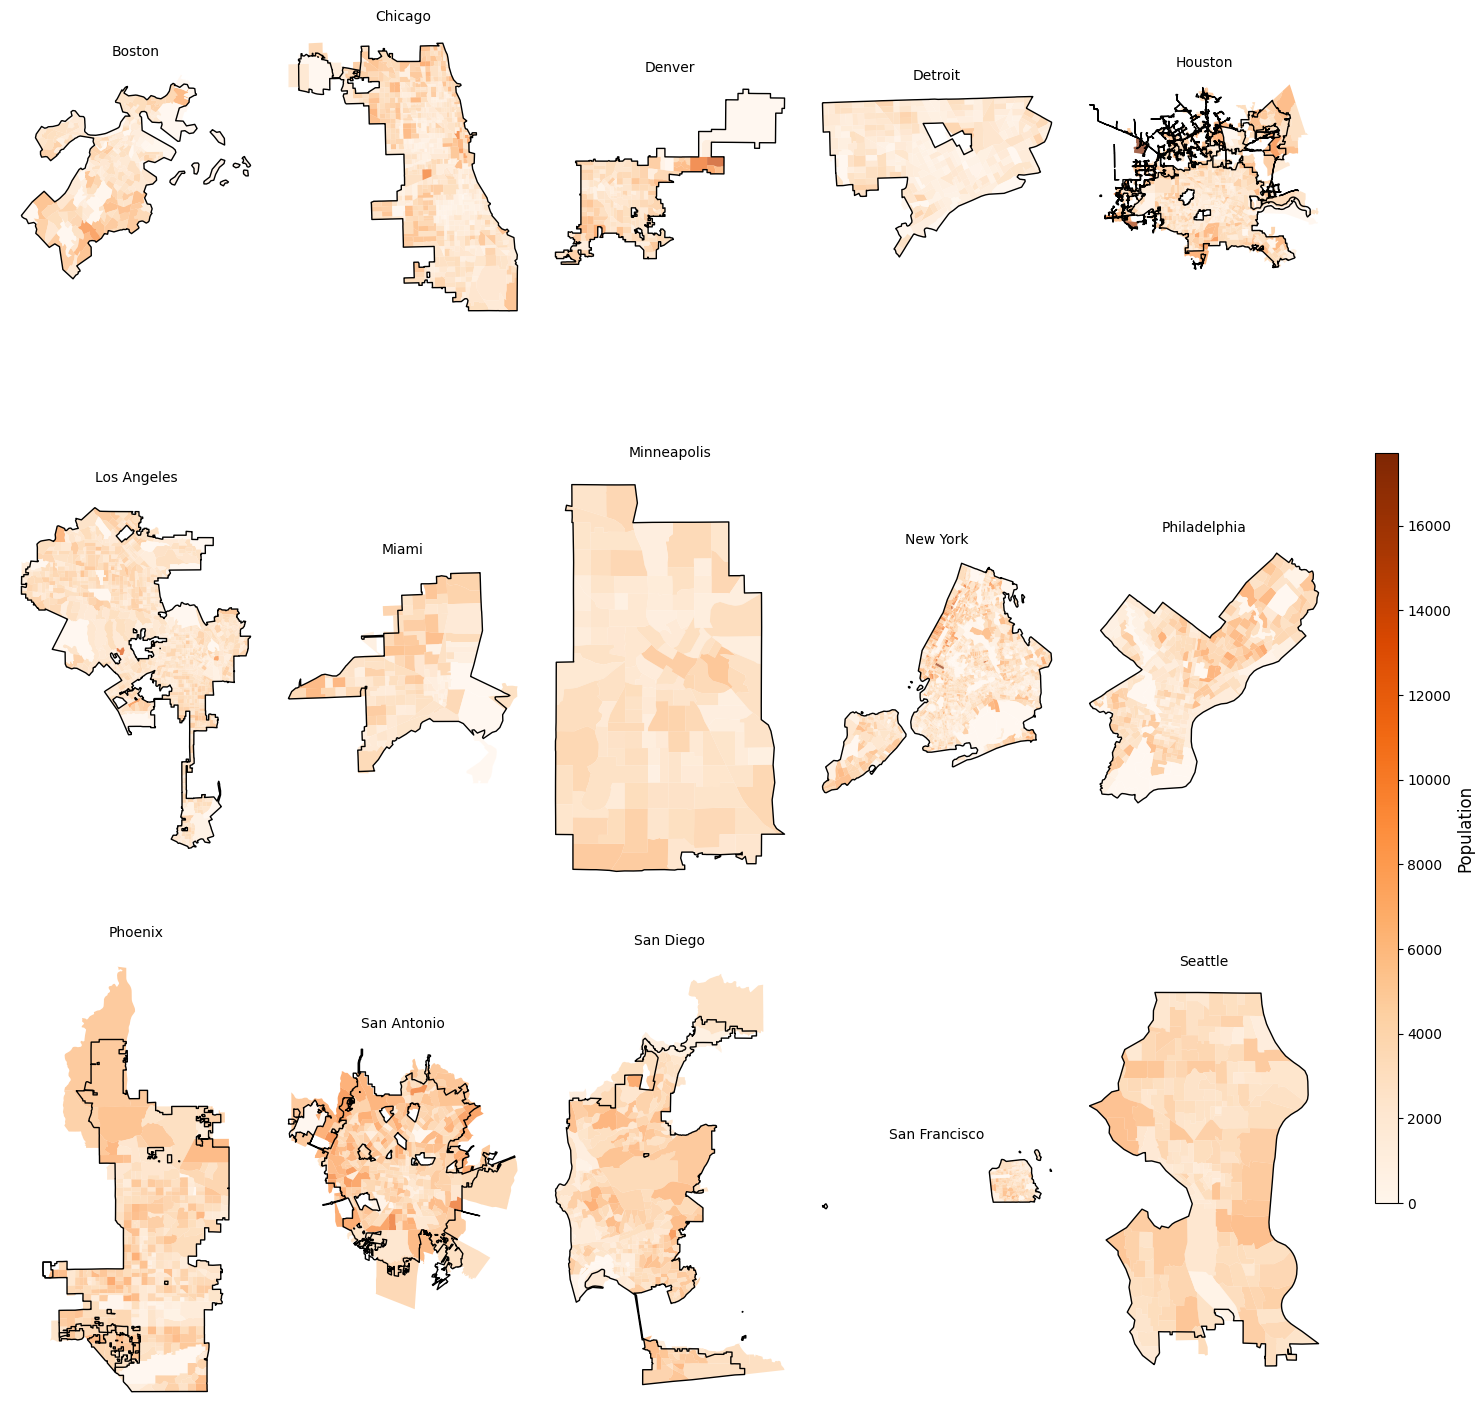

In [287]:

# 1. Calculate global min/max for the color scale
vmin = met_i[fill_value].min()
vmax = met_i[fill_value].max()


# 2. Define layout
# Define layout: adjust rows/cols based on n
cols = 5
rows = (n + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))
axes = axes.flatten()

for i, name in enumerate(urban_names):
    ax = axes[i]
    subset = met_i[met_i[city_name_column] == name]

    # Create a clean filename (replace spaces or special characters if needed)
    filename = f"aoi_{name.replace(' ', '_')}.shp"
    filepath = os.path.join(output_dir, filename); print(filepath)
    # Save to shapefile
    subset.to_file(filepath)
    
    # Plot the subset
    subset.plot(column=fill_value, 
                ax=ax, 
                cmap='Oranges',
                vmin=vmin,            # Use global scale
                vmax=vmax,
                # edgecolor='gray',   
                # linewidth=0.1,
                # legend=True, 
                legend=False,         # Hide individual legends
                alpha=0.7)
    
    place_data_filtered[
        place_data_filtered[city_name_column] == name
        ].boundary.plot(ax=ax, color='black', linewidth=1)
    
    ax.set_title(f"{name}", fontsize=10)
    ax.axis('off')

# Turn off any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')


## (1) simple layout ----------------------------
# plt.tight_layout()


## (2) Add a single shared colorbar -------------
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.cm as cm
import matplotlib.colorbar as cb

# Create colorbar axis
fig.subplots_adjust(right=0.9)
cax = fig.add_axes([0.92, 0.15, 0.015, 0.5])  # [left, bottom, width, height]

# Create scalar mappable
sm = cm.ScalarMappable(cmap='Oranges', 
                       norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []  # dummy array for colorbar
cbar = fig.colorbar(sm, cax=cax)
cbar.set_label('Population', fontsize=12)

plt.tight_layout(rect=[0, 0, 0.9, 1])




# 3. Save the figure
f = os.path.join(dir_figure, "aoi_facets_place_2020.png")
plt.savefig(f, dpi=300)
plt.show()

## Urban Area

In [288]:
ua = gpd.read_file(dir_ua)

print(ua.columns)


# Filter cities
# cities = ["San Francisco", "San Antonio", "Los Angeles", "Minneapolis", "Seattle", "Pittsburgh"]
cities = ["San Francisco", "San Antonio", "Los Angeles", "Minneapolis"]
ua_i = ua[ua['NAME20'].str.contains('|'.join(cities))]


Index(['UACE20', 'AFFGEOID20', 'GEOID20', 'NAME20', 'NAMELSAD20', 'LSAD20',
       'ALAND20', 'AWATER20', 'geometry'],
      dtype='object')


### overlay tract with UA or Metro - 1

In [289]:

# Spatial Intersection
intersection = gpd.overlay(tracts, ua_i, how='intersection')

# Compute area of intersection
intersection['overlap_area'] = intersection.geometry.area

# Calculate original tract area
tracts['tract_area'] = tracts.geometry.area


# Second overlap calculation with NAME20
tract_overlap2 = intersection.groupby(['GEOID', 'NAME20'])['overlap_area'].sum().reset_index()
tract_overlap2 = tract_overlap2.merge(tracts.drop(columns='geometry'), on='GEOID')
tract_overlap2['overlap_ratio'] = tract_overlap2['overlap_area'] / tract_overlap2['tract_area']
tract_overlap2 = tract_overlap2[tract_overlap2['overlap_ratio'] >= 0.1]


# Make sure tract_overlap2 is merged with geometry


tract_overlap2_gdf = tract_overlap2.merge(tracts[['GEOID', 'geometry']], on='GEOID')
tract_overlap2_gdf = gpd.GeoDataFrame(tract_overlap2_gdf, geometry='geometry', crs=tracts.crs)


print(tract_overlap2_gdf.shape)


# Save shapefile
output_path = os.path.join(output_dir, "tract_ua_2020_py.shp")
tract_overlap2_gdf.to_file(output_path)
print(f"Shapefile saved to: {output_path}")


C:\Users\pc\AppData\Local\Temp\ipykernel_20372\1428653390.py:2: UserWarning: `keep_geom_type=True` in overlay resulted in 541 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  intersection = gpd.overlay(tracts, ua_i, how='intersection')
C:\Users\pc\AppData\Local\Temp\ipykernel_20372\1428653390.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  intersection['overlap_area'] = intersection.geometry.area
C:\Users\pc\AppData\Local\Temp\ipykernel_20372\1428653390.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  tracts['tract_area'] = tracts.geometry.area
C:\Users\pc\AppData\Local\Temp\ipykernel_20372\1428653390.py:30: UserWarning: Column names longer than

(4848, 12)
Shapefile saved to: d:\natcap\invest-mental-health\data\aoi\tract_ua_2020_py.shp


### overlay tract with UA or Metro - 2

In [290]:
# Aggregate overlap area by GEOID
tract_overlap1 = intersection.groupby('GEOID')['overlap_area'].sum().reset_index()

# Join overlap back to original tracts
tract_overlap1 = tracts.merge(tract_overlap1, on='GEOID')
tract_overlap1['overlap_ratio'] = tract_overlap1['overlap_area'] / tract_overlap1['tract_area']

# Filter by overlap ratio
tract_overlap1 = tract_overlap1[tract_overlap1['overlap_ratio'] >= 0.1]


tract_overlap1_gdf = tract_overlap2.merge(tracts[['GEOID', 'geometry']], on='GEOID')
tract_overlap1_gdf = gpd.GeoDataFrame(tract_overlap1_gdf, geometry='geometry', crs=tracts.crs)



### plot

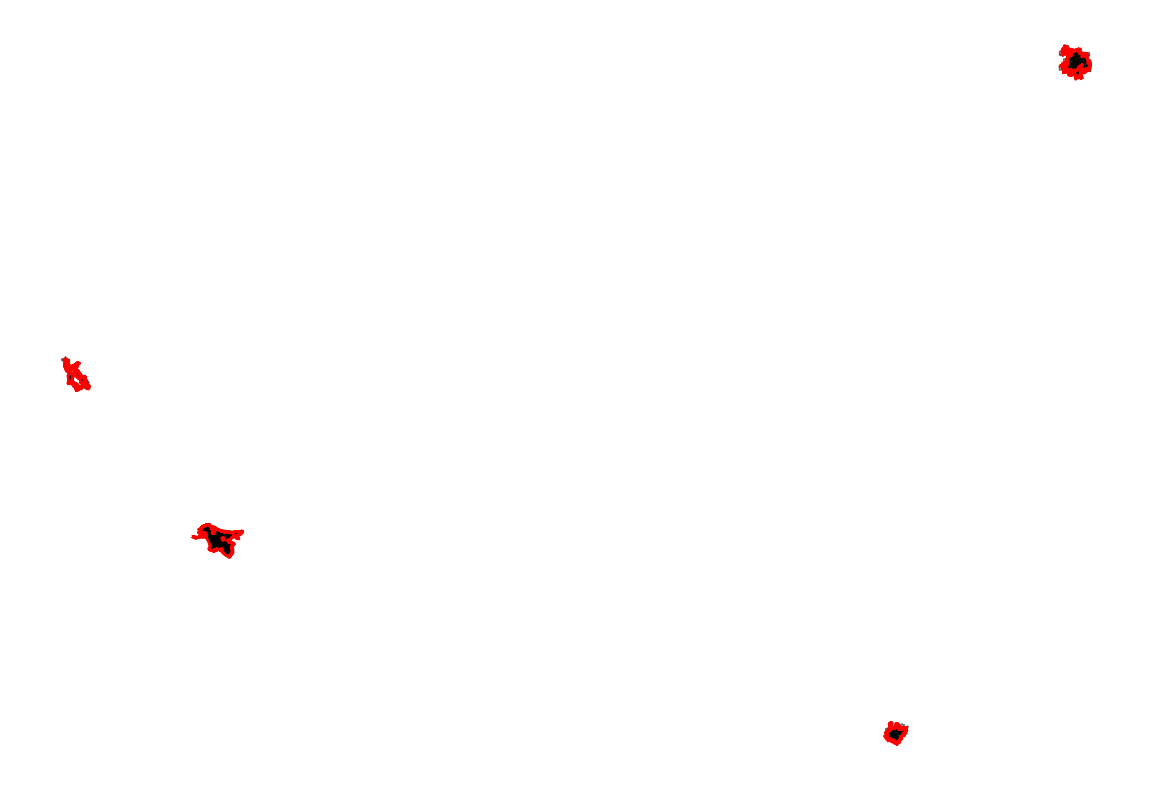

In [291]:

# Plot using geopandas (similar to ggplot and tmap visualization)
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 8))
tract_overlap2_gdf = tracts.merge(tract_overlap2[['GEOID', 'NAME20']], on='GEOID')
tract_overlap2_gdf.plot(column='GEOID', alpha=0.5, edgecolor='k', ax=ax, legend=False)
ua_i.boundary.plot(ax=ax, color='red', linewidth=2)
plt.axis('off')
plt.tight_layout()
plt.show()

# Faceted plots can be done with seaborn/matplotlib or geopandas.explore, but for simplicity, not included here.


### plot shp

  STATEFP COUNTYFP        GEOID    ALAND  \
0      06      001  06001444100  2955571   
1      06      001  06001406201   408064   
2      06      001  06001406202   392183   
3      06      001  06001428000   525761   
4      06      001  06001409700   811103   

                                            geometry  tract_area    variable  \
0  POLYGON ((-122.04505 37.55626, -122.0425 37.55...    0.000308  B01003_001   
1  POLYGON ((-122.23551 37.7838, -122.23429 37.78...    0.000042  B01003_001   
2  POLYGON ((-122.22994 37.7824, -122.22754 37.78...    0.000040  B01003_001   
3  POLYGON ((-122.25114 37.77086, -122.24826 37.7...    0.000054  B01003_001   
4  POLYGON ((-122.17055 37.76, -122.16873 37.7609...    0.000084  B01003_001   

   pop_tract    year                      NAME20  
0     7667.0  2020.0  San Francisco--Oakland, CA  
1     4954.0  2020.0  San Francisco--Oakland, CA  
2     4712.0  2020.0  San Francisco--Oakland, CA  
3     3168.0  2020.0  San Francisco--Oakland, CA  

C:\Users\pc\AppData\Local\Temp\ipykernel_20372\1653429719.py:62: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


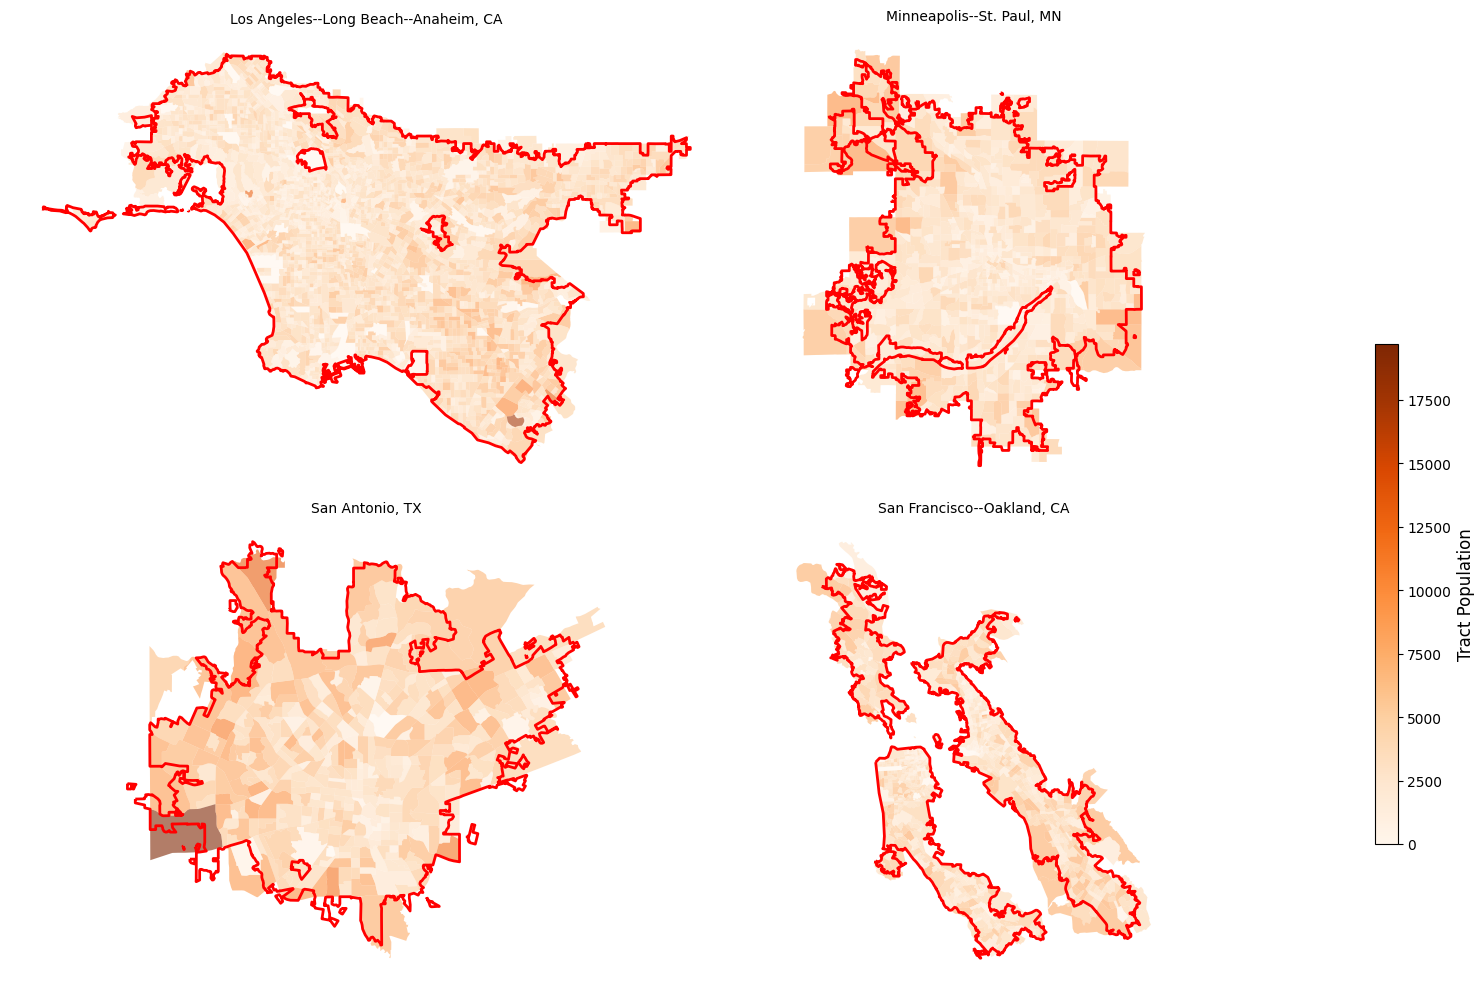

In [292]:

tract_overlap_input = tract_overlap1_gdf
tract_overlap_input = tract_overlap2_gdf

print(tract_overlap_input.head())

# Unique urban area names
urban_names = sorted(tract_overlap_input['NAME20'].unique() )
n = len(urban_names)


fill_value = 'pop_tract'

# 1. Calculate global min/max for the color scale
vmin = tract_overlap_input[fill_value].min()
vmax = tract_overlap_input[fill_value].max()


# Define layout: adjust rows/cols based on n
cols = 2
rows = (n + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))
axes = axes.flatten()

for i, name in enumerate(urban_names):
    ax = axes[i]
    subset = tract_overlap_input[tract_overlap_input['NAME20'] == name]
    
    subset.plot(
        column=fill_value, 
        cmap='Oranges',
        vmin=vmin,            # Use global scale
        vmax=vmax,
        ax=ax, 
        legend=False, alpha=0.6)
    ua_i[ua_i['NAME20'] == name].boundary.plot(ax=ax, color='red', linewidth=2)
    
    ax.set_title(f"{name}", fontsize=10)
    ax.axis('off')

# Turn off any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# plt.tight_layout()

# Add a single shared colorbar -------------
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.cm as cm
import matplotlib.colorbar as cb

# Create colorbar axis
fig.subplots_adjust(right=0.9)
cax = fig.add_axes([0.92, 0.15, 0.015, 0.5])  # [left, bottom, width, height]

# Create scalar mappable
sm = cm.ScalarMappable(cmap='Oranges', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []  # dummy array for colorbar
cbar = fig.colorbar(sm, cax=cax)
cbar.set_label('Tract Population', fontsize=12)

plt.tight_layout(rect=[0, 0, 0.9, 1])


# 3. Save the figure
f = os.path.join(dir_figure, "aoi_facets_urban_area_2020_v2.png")
plt.savefig(f, dpi=300)
plt.show()
